In [4]:
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

import seaborn as sns

In [5]:
filename="cleaned_marijuana_data.csv"
df = pd.read_csv(filename, index_col=0)
df.head()

,ID,GENDER,AGE,EDUCATION_KID,EDUCATION_ADULT,MARRIAGE,PREGNANCY,INCOME,INCOME_RATIO,HOUSEHOLD_NUM,...,EVER_USE,FIRST_USAGE,FREQUENCY,PER_MONTH,AGE_REGULAR_USE,LAST_ONCE_MONTH,AMOUNT,LAST_USAGE,PAST_MONTH_USAGE,CHILDREN_NUM
0,83732.0,1.0,62.0,NaN,5.0,1.0,NaN,10.0,4.39,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,83733.0,1.0,53.0,NaN,3.0,3.0,NaN,4.0,1.32,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,83735.0,2.0,56.0,NaN,5.0,6.0,NaN,10.0,5.00,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,83736.0,2.0,42.0,NaN,4.0,3.0,1.0,7.0,1.23,5.0,...,1.0,25.0,5.0,1.0,25.0,0.0,4.0,1.0,30.0,2.0
4,83741.0,1.0,22.0,NaN,4.0,5.0,NaN,7.0,2.08,3.0,...,1.0,15.0,4.0,1.0,16.0,1.0,2.0,1.0,25.0,0.0


In [6]:
#desc = df.describe()

### Age First Used

Text(0.5,1,'Adult Edu v. Age First Used')

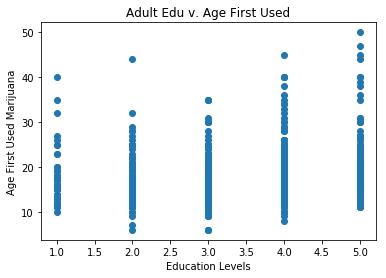

In [7]:
plt.scatter(df['EDUCATION_ADULT'], df['FIRST_USAGE'])
plt.xlabel('Education Levels')
plt.ylabel('Age First Used Marijuana')
plt.title('Adult Edu v. Age First Used')

Key for Education Levels
- 1 - Less than 9th grade
- 2 - 9th-11th grade (+ 12th grade no diploma)
- 3 - HS graduate/GED or equivalent
- 4 - some college or AA degree
- 5 - college graduate or above

In [8]:
#graphs exploring dat against normal ditrubution 
xs = np.arange(lower.min(), lower.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(lower), np.std(lower))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(lower, density=True, label='Actual Data');
plt.title('Lower Edu Level')
plt.legend();

NameError: name 'lower' is not defined

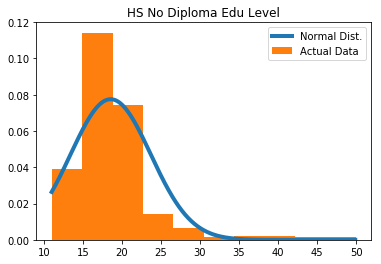

In [91]:
xs = np.arange(grad.min(), grad.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(grad), np.std(grad))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(grad, density=True, label='Actual Data');
plt.title('HS No Diploma Edu Level')
plt.legend();

Running tests for normal distribution shows that these data withing each education level is not distributed normally. Therefore, we must be careful with analysis and running tests so that they do not result in invalidity. 

In [125]:
[t, p] = ttest_ind(lower, grad)
print(t, p)

[t2, p2] = ttest_ind(nodip, grad)
print(t2, p2)

[t3, p3] = ttest_ind(dip, grad)
print(t3, p3)

[t4, p4] = ttest_ind(aa, grad)
print(t4, p4)

2.4815116237816026 0.013453381988390689
-4.639106308343763 4.338126428668713e-06
-5.887361511570196 5.8718346683875755e-09
-3.499767874851145 0.0004865093404055903


Tests for first time usage against graduated group to see if there is a relatationship between first time usage and education level. There is only one significance difference between the Some College/AA group and Graduates Group.

Text(0.5,1,'Adult Edu v. Age First Used')

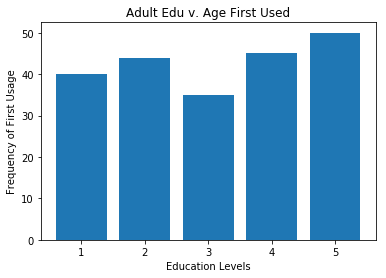

In [94]:
plt.bar(nonull['EDUCATION_ADULT'], nonull['FIRST_USAGE'])
plt.xlabel('Education Levels')
plt.ylabel('Frequency of First Usage')
plt.title('Adult Edu v. Age First Used')

<BarContainer object of 1715 artists>

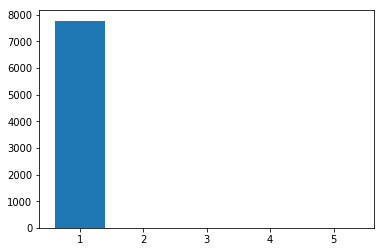

In [120]:
#drop null values in PER_MONTH
nonull2 = df.dropna(subset=['PER_MONTH'])

lower = nonull2[nonull2['EDUCATION_ADULT'] == 1]['PER_MONTH'].values
lower

plt.bar(nonull2['EDUCATION_ADULT'], nonull2['PER_MONTH'])

'\nKey for Education Levels\n1 - Less than 9th grade\n2 - 9th-11th grade (+ 12th grade no diploma)\n3 - HS graduate/GED or equivalent\n4 - some college or AA degree\n5 - college graduate or above\n'

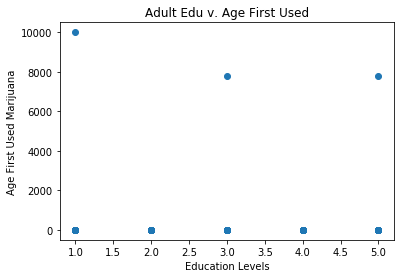

In [53]:
plt.scatter(df['EDUCATION_ADULT'], df['FREQUENCY'])
plt.xlabel('Education Levels')
plt.ylabel('Age First Used Marijuana')
plt.title('Adult Edu v. Age First Used')

"""
Key for Education Levels
1 - Less than 9th grade
2 - 9th-11th grade (+ 12th grade no diploma)
3 - HS graduate/GED or equivalent
4 - some college or AA degree
5 - college graduate or above
"""

In [102]:
df_kid = df[df.AGE < 20]
df_adult = df[df.AGE > 20]
df_kid.shape
df_adult.shape

(4503, 21)

Text(0.5,0,'Number of joints or pipes')

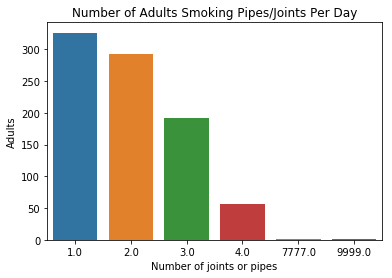

In [104]:
sns.countplot(dfadult['AMOUNT'], data=df_adult)
ax = plt.gca()

ax.set_title('Number of Adults Smoking Pipes/Joints Per Day')
ax.set_ylabel('Adults')
ax.set_xlabel('Number of joints or pipes')

Text(0.5,0,'Education Level')

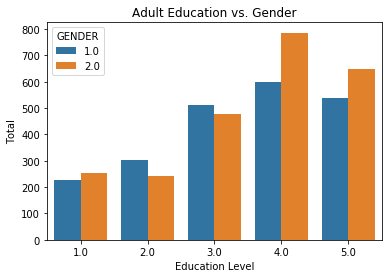

In [121]:
# generate grouped barplot by specifying hue
sns.countplot(x='EDUCATION_ADULT', hue = 'GENDER', 
              data=dfadult)
ax = plt.gca()

ax.set_title('Adult Education vs. Gender')
ax.set_ylabel('Total')

ax.set_xlabel('Education Level')

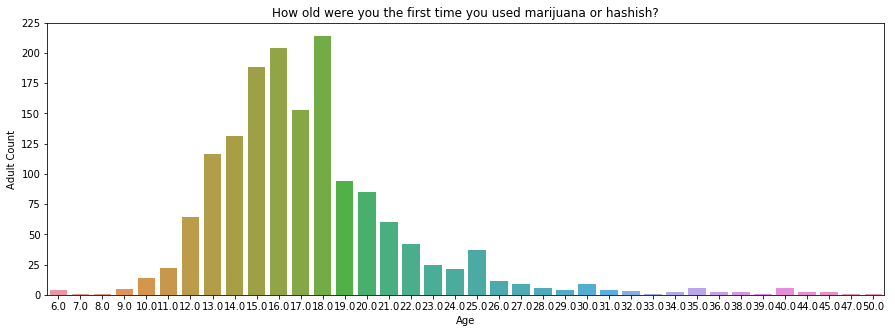

In [118]:
sns.countplot(x='FIRST_USAGE', data=df_adult)
ax = plt.gca()

# add title and axis labels (modify x-axis label)
ax.set_title('How old were you the first time you used marijuana or hashish?')
ax.set_ylabel('Adult Count')
ax.set_xlabel('Age')

fig = plt.gcf()
fig.set_size_inches(15,5)

In [119]:
import patsy
import statsmodels.api as sm

x = df_adult['EDUCATION_ADULT']
y = df_adult['AMOUNT']
np.corrcoef(x, y)

array([[ 1., nan],
       [nan, nan]])

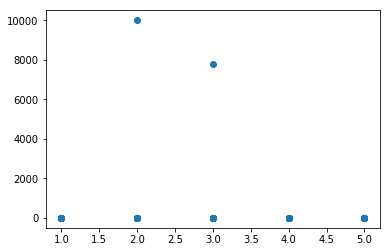

In [108]:
plt.scatter(x, y);

In [109]:
outcome, predictors = patsy.dmatrices('y ~ x')
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.821
Date:                Wed, 05 Jun 2019   Prob (F-statistic):              0.178
Time:                        10:18:33   Log-Likelihood:                -5918.3
No. Observations:                 786   AIC:                         1.184e+04
Df Residuals:                     784   BIC:                         1.185e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     94.6174     54.342      1.741      0.0

In [110]:
aa = nonull[nonull['EDUCATION_ADULT'] == 4]['FIRST_USAGE'].values
mean_four = aa.mean()
print(mean_four)
[t, p] = ttest_ind(, )
print(t, p)

SyntaxError: invalid syntax (<ipython-input-110-8da648a85ddf>, line 4)

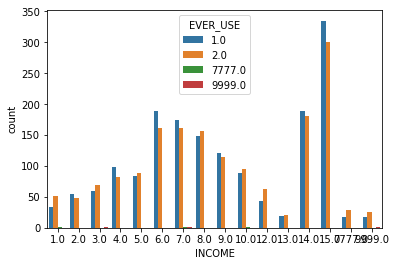

In [129]:
# generate grouped barplot by specifying hue
sns.countplot(x='INCOME', hue = 'EVER_USE', 
              data=df)
ax = plt.gca()

Key
- 1 - Have tried
- 2 - Have not tried

In [135]:
x = ['INCOME']
y = df['EVER_USE']

outcome, predictors = patsy.dmatrices('x ~ y')
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

PatsyError: Number of rows mismatch between x and y (1 versus 4843)
    x ~ y
        ^